# View Results of LibTadTran in Thermal mode

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : January 23th 2020
- update : 
 

In [1]:
import os
import re
import numpy as np

In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [5]:
from scipy import signal

In [6]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(16,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# UVSPEC_LOWTRAN_THERMAL

In [8]:
! cat UVSPEC_LOWTRAN_THERMAL.INP

# uvspec data files
data_files_path ../data/
atmosphere_file ../examples/AFGLUS.70KM
source thermal ../examples/UVSPEC_LOWTRAN_THERMAL.TRANS

rte_solver twostr     # Radiative transfer equation solver
pseudospherical
wavelength_grid_file ../examples/UVSPEC_LOWTRAN_THERMAL.TRANS

mol_abs_param LOWTRAN  # select LOWTRAN molecular absorption 

output_process per_nm

quiet


In [9]:
! head UVSPEC_LOWTRAN_THERMAL.OUT

2999.000000 0.055703
3003.000000 0.056525
3008.000000 0.061169
3012.000000 0.062145
3017.000000 0.066606
3021.000000 0.067760
3026.000000 0.070878
3030.000000 0.072134
3035.000000 0.078932
3040.000000 0.082551


In [10]:
file="UVSPEC_LOWTRAN_THERMAL.OUT"

In [11]:
arr=np.loadtxt(file)

In [12]:
wl=arr[:,0]
out=arr[:,1]

(0, 20000)

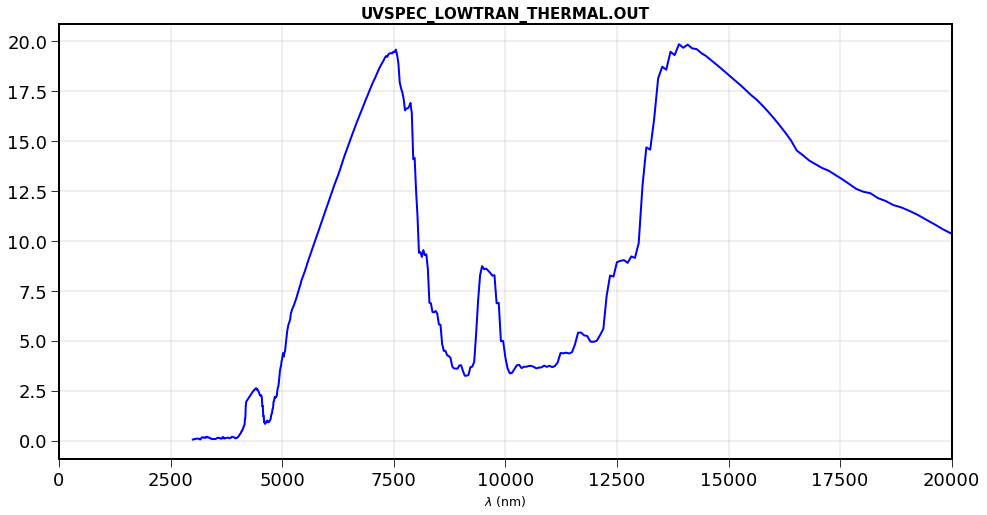

In [13]:
plt.plot(wl,out,'b')
plt.grid()
plt.title(file)
plt.xlabel("$\\lambda$ (nm)")
plt.xlim(0,20000)

# UVSPEC_REPTRAN_THERMAL

In [14]:
! cat UVSPEC_REPTRAN_THERMAL.INP

rte_solver disort          # Radiative transfer equation solver

# Uncomment the following line to use finer spectral resolution
#mol_abs_param reptran fine 


                           # calculate brightness temperature
output_quantity brightness 

albedo 0                   # set albedo to 0, emissivity to 1
source thermal             # thermal
wavelength 2500 100000

zout TOA                   # top of atmosphere
                           # looking downward
umu 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

output_user lambda uu

quiet


In [15]:
! head UVSPEC_REPTRAN_THERMAL.OUT

 2504.705   2.580772400e+02   2.641565552e+02   2.677307434e+02   2.701739197e+02   2.719737854e+02   2.733674011e+02   2.744860840e+02   2.754077454e+02   2.761834106e+02   2.768467712e+02 
 2514.151   2.498085480e+02   2.554998169e+02   2.589509277e+02   2.614377441e+02   2.633701782e+02   2.649368286e+02   2.662425232e+02   2.673520508e+02   2.683096619e+02   2.691463928e+02 
 2523.668   2.487262878e+02   2.542983093e+02   2.577001648e+02   2.601684265e+02   2.621005554e+02   2.636783142e+02   2.650038147e+02   2.661394348e+02   2.671294250e+02   2.680039062e+02 
 2533.258   2.403957367e+02   2.452415771e+02   2.483045044e+02   2.505601654e+02   2.523520966e+02   2.538424225e+02   2.551205444e+02   2.562412720e+02   2.572393799e+02   2.581399841e+02 
 2542.921   2.390502167e+02   2.437947540e+02   2.468531189e+02   2.491209717e+02   2.509294891e+02   2.524371490e+02   2.537319641e+02   2.548676300e+02   2.558796997e+02   2.567912903e+02 
 2552.658   2.376915894e+02   2.423672943e+02

In [16]:
file="UVSPEC_REPTRAN_THERMAL.OUT"

In [17]:
arr=np.loadtxt(file)

In [18]:
arr.shape

(260, 11)

In [19]:
NBC=arr.shape[1]-1

In [20]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)

In [21]:
wl=arr[:,0]
out=arr[:,1]

(0, 20000)

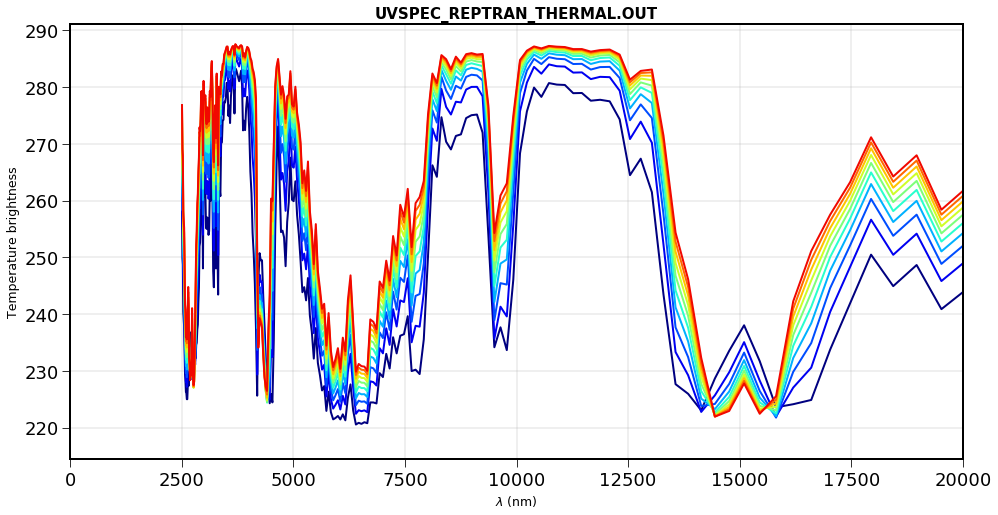

In [22]:
for ii in np.arange(NBC):
    plt.plot(wl,arr[:,ii+1],color=all_colors[ii])
plt.grid()
plt.title(file)
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Temperature brightness")
plt.xlim(0,20000)

# UVSPEC_FULIOU_THERMAL

In [23]:
! cat UVSPEC_FULIOU_THERMAL.INP

                         # Location of atmospheric profile file. 
atmosphere_file ../examples/KTROP.UVSPEC 

                         # Location of the extraterrestrial spectrum
source thermal ../data/solar_flux/fu      # Thermal irradiance

albedo 0.0

rte_solver disort        # Radiative transfer equation solver
number_of_streams  4                  # Number of streams

wavelength_index 7 18    # Use only the 12 thermal bands

mol_abs_param FU          # Correlated-k by Fu and Liou [1992/93]

quiet


In [24]:
! head UVSPEC_FULIOU_THERMAL.OUT

 4900.000  0.000000e+00  4.458450e+00  5.399673e+00  0.000000e+00  7.513658e-01  8.593847e-01 
 5600.000  0.000000e+00  7.874094e+00  7.893190e+00  0.000000e+00  1.253961e+00  1.256240e+00 
 6500.000  0.000000e+00  2.534109e+01  2.536350e+01  0.000000e+00  4.034052e+00  4.036727e+00 
 7600.000  0.000000e+00  2.239441e+01  2.284178e+01  0.000000e+00  3.582783e+00  3.635382e+00 
 8500.000  0.000000e+00  1.835314e+01  3.271203e+01  0.000000e+00  3.444869e+00  5.206282e+00 
 9600.000  0.000000e+00  1.696516e+01  3.471155e+01  0.000000e+00  3.360399e+00  5.524515e+00 
11300.000  0.000000e+00  4.294622e+01  6.732413e+01  0.000000e+00  7.954998e+00  1.071497e+01 
13700.000  0.000000e+00  5.541988e+01  5.844138e+01  0.000000e+00  8.968612e+00  9.301233e+00 
16600.000  0.000000e+00  6.191746e+01  6.232002e+01  0.000000e+00  9.870782e+00  9.918538e+00 
21500.000  0.000000e+00  6.318095e+01  6.329269e+01  0.000000e+00  1.006001e+01  1.007334e+01 


In [25]:
file="UVSPEC_FULIOU_THERMAL.OUT"

In [26]:
arr=np.loadtxt(file)

In [27]:
arr.shape

(12, 7)

In [28]:
NBC=arr.shape[1]-1

In [29]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)

In [30]:
wl=arr[:,0]
out=arr[:,1]

(0, 20000)

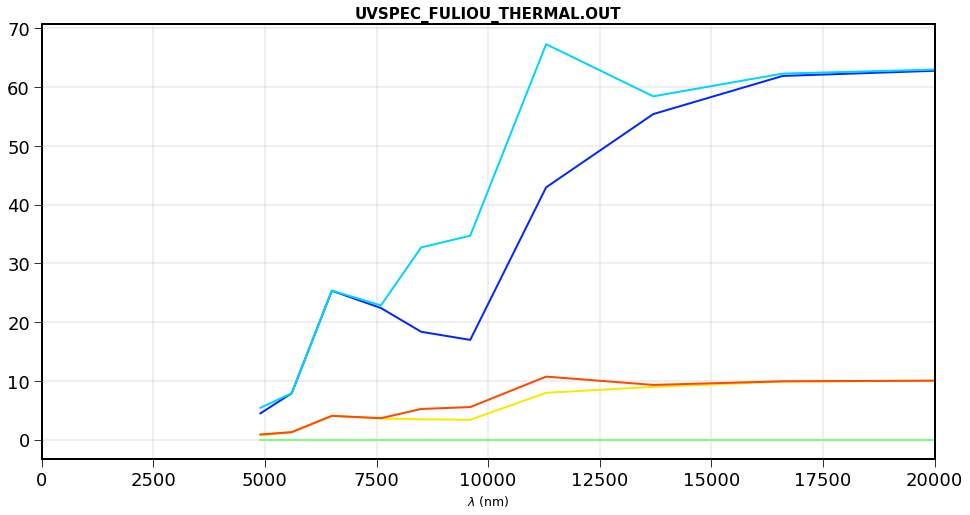

In [31]:
for ii in np.arange(NBC):
    plt.plot(wl,arr[:,ii+1],color=all_colors[ii])
plt.grid()
plt.title(file)
plt.xlabel("$\\lambda$ (nm)")
#plt.ylabel("Temperature brightness")
plt.xlim(0,20000)

# UVSPEC_RODENTS_ZOUT

In [32]:
! cat UVSPEC_RODENTS_ZOUT_THERMAL.INP

                         # Location of atmospheric profile file. 
atmosphere_file ../data/atmmod/afglus.dat
                         # Location of the extraterrestrial spectrum
source thermal ../data/solar_flux/atlas_plus_modtran

wavelength_index 7 18     # Wavelength range [nm]
mol_abs_param fu

aerosol_vulcan 1          # Aerosol type above 2km
aerosol_haze 6            # Aerosol type below 2km
aerosol_season 1          # Summer season
aerosol_visibility 20.0   # Visibility
aerosol_angstrom 1.1 0.2  # Scale aerosol optical depth 
                          # using Angstrom alpha and beta
                          # coefficients
aerosol_modify ssa scale 0.85    # Scale the single scattering albedo 
                          # for all wavelengths
aerosol_modify gg set 0.70       # Set the asymmetry factor
aerosol_file tau ../examples/AERO_TAU.DAT
                          # File with aerosol optical depth profile

wc_file 1D ../examples/WCSIMPLE.DAT  # Location of water cloud file
wc_m

In [33]:
! head UVSPEC_RODENTS_ZOUT_THERMAL.OUT

   0.000000  0.000000e+00  2.451121e+00  3.628141e+00 
   0.100000  0.000000e+00  2.430662e+00  3.629471e+00 
   0.200000  0.000000e+00  2.413946e+00  3.620064e+00 
   0.300000  0.000000e+00  2.400758e+00  3.603631e+00 
   0.400000  0.000000e+00  2.390996e+00  3.582325e+00 
   0.500000  0.000000e+00  2.384660e+00  3.557401e+00 
   0.600000  0.000000e+00  2.381936e+00  3.529587e+00 
   0.700000  0.000000e+00  2.383429e+00  3.499289e+00 
   0.800000  0.000000e+00  2.390682e+00  3.466676e+00 
   0.900000  0.000000e+00  2.407297e+00  3.431671e+00 


In [34]:
file="UVSPEC_RODENTS_ZOUT_THERMAL.OUT"

In [35]:
arr=np.loadtxt(file)

In [36]:
arr.shape

(360, 4)

Text(0, 0.5, 'e down')

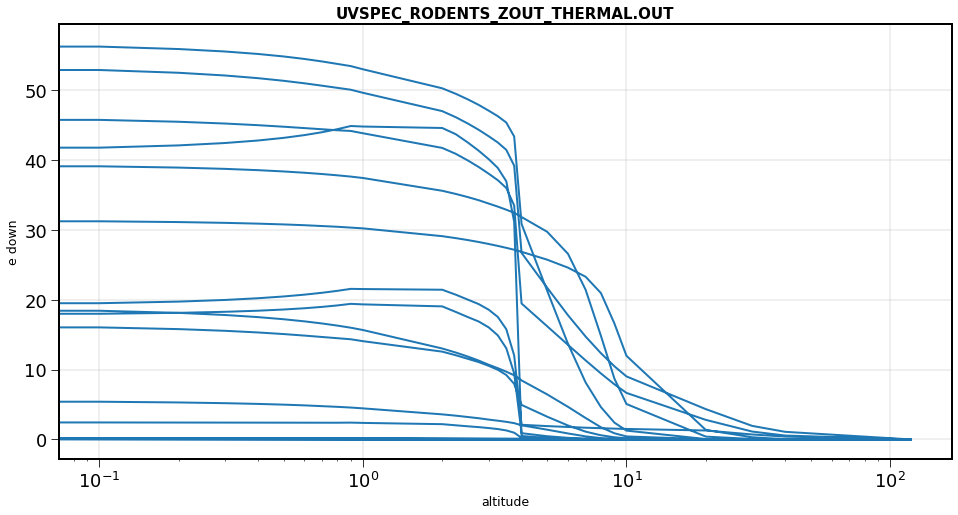

In [37]:
plt.semilogx(arr[:,0],arr[:,2],'-')
plt.grid()
plt.title(file)
plt.xlabel("altitude")
plt.ylabel("e down")

Text(0, 0.5, 'e up')

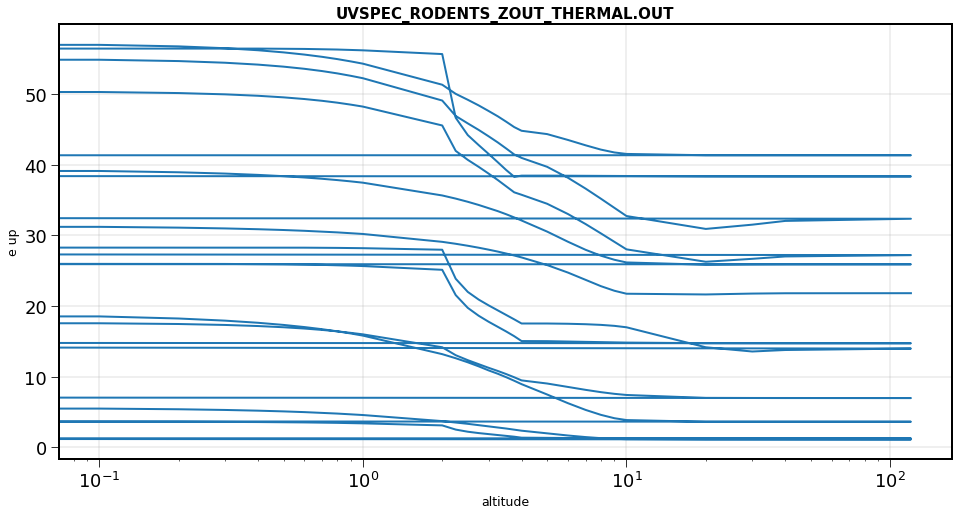

In [38]:
plt.semilogx(arr[:,0],arr[:,3],'-')
plt.grid()
plt.title(file)
plt.xlabel("altitude")
plt.ylabel("e up")